# プログラミング課題

In [1]:
# 環境特有のwarningが出ないようにする。自分でプログラミングするときは必要ありません。
import warnings
warnings.filterwarnings('ignore')

## 課題1 データの集計

pandasのDataFrameを利用するといろいろ便利な集計ができる。

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from IPython.display import display
from sklearn.datasets import load_iris

In [3]:
iris = load_iris()
iris = pd.DataFrame(iris['data'], columns=iris['feature_names'])
display(iris.head())

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [4]:
summary = iris.describe()
summary.loc['range', :] = summary.loc['max', :] - summary.loc['min', :]  # レンジを追加
display(summary)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000
range,3.600000,2.400000,5.900000,2.400000


In [5]:
display(iris.cov())
display(iris.corr())

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
sepal length (cm),0.685694,-0.039268,1.273682,0.516904
sepal width (cm),-0.039268,0.188004,-0.321713,-0.117981
petal length (cm),1.273682,-0.321713,3.113179,1.296387
petal width (cm),0.516904,-0.117981,1.296387,0.582414


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
sepal length (cm),1.000000,-0.109369,0.871754,0.817954
sepal width (cm),-0.109369,1.000000,-0.420516,-0.356544
petal length (cm),0.871754,-0.420516,1.000000,0.962757
petal width (cm),0.817954,-0.356544,0.962757,1.000000


## 課題2 MLR

- bostonのデータセットを利用して回帰を行う。
- `make_pipeline`を使って`StandardScaler`と`LinearRegression`をつなぐと、訓練データの平均や分散で自動でスケーリングしてくれる

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.datasets import load_boston
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score

In [7]:
boston = load_boston()
X = boston.data
y = boston.target

In [8]:
lr_model = make_pipeline(
    StandardScaler(),
    LinearRegression()
)

lr_model.fit(X, y)

Pipeline(steps=[('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('linearregression', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False))])

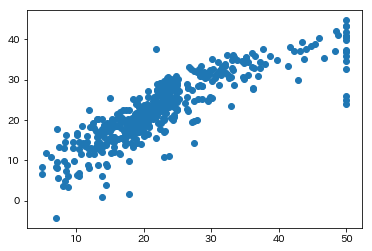

In [9]:
y_pred = lr_model.predict(X)
plt.scatter(y, y_pred)
plt.show()

In [10]:
print('r2', r2_score(y, lr_model.predict(X)))
print('r2val', cross_val_score(lr_model, X, y, cv=5, scoring='r2').mean())

r2 0.740607742865
r2val 0.350741350933


## 課題4 PCA

- irisのデータセットに対してPCAで次元削減する
- 寄与率・累積寄与率を可視化する

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.datasets import load_iris
from sklearn.decomposition import PCA

In [12]:
iris = load_iris()
X = iris.data

In [13]:
n_components = 2

pca_model = PCA(n_components=n_components)
X_trans = pca_model.fit_transform(X)

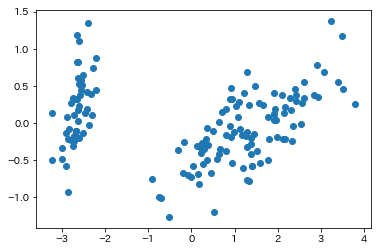

In [14]:
plt.scatter(X_trans[:, 0], X_trans[:, 1])
plt.show()

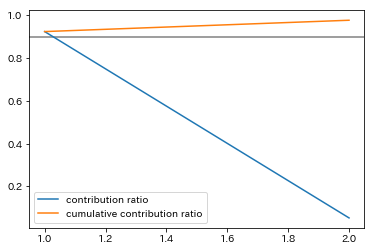

In [15]:
plt.axhline(y=0.9, c='gray')  # 累積寄与率90%のラインを見たい場合
plt.plot(range(1, n_components+1), pca_model.explained_variance_ratio_, label='contribution ratio')
plt.plot(range(1, n_components+1), pca_model.explained_variance_ratio_.cumsum(), label='cumulative contribution ratio')
plt.legend()
plt.show()

## 課題5 PLS

- bostonのデータセットに対してPLSを利用して回帰を行う
- `cross_val_predict`を利用してクロスバリデーションの予測結果を出す

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.datasets import load_boston
from sklearn.cross_decomposition import PLSRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_predict, LeaveOneOut
from sklearn.metrics import r2_score

In [17]:
boston = load_boston()
X = boston.data
y = boston.target

In [18]:
pls_model = make_pipeline(
    StandardScaler(),
    PLSRegression(n_components=3)
)
pls_model.fit(X, y)

Pipeline(steps=[('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('plsregression', PLSRegression(copy=True, max_iter=500, n_components=3, scale=True, tol=1e-06))])

In [19]:
y_pred = pls_model.predict(X)
print('r2', r2_score(y, y_pred))

y_val = cross_val_predict(pls_model, X, y, cv=LeaveOneOut())
print('r2val', r2_score(y, y_val))

r2 0.72292187345
r2val 0.703345987813


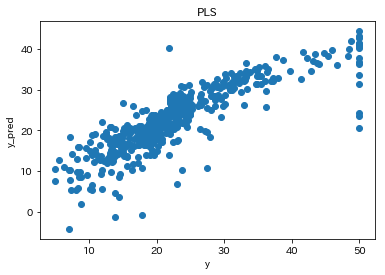

In [20]:
plt.scatter(y, y_pred)
plt.title('PLS')
plt.xlabel('y')
plt.ylabel('y_pred')
plt.show()